# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

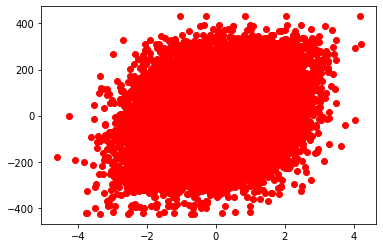

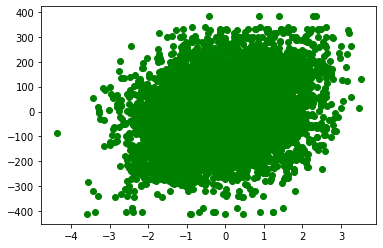

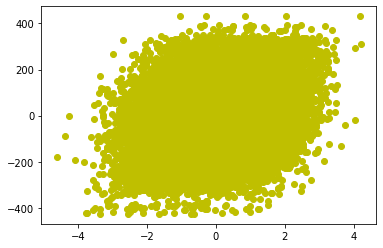

(8000, 5)
40000
(2000, 5)
(8000,)
(2000,)


In [ ]:
import matplotlib.pyplot as plt

# Your code here

plt.plot(X_train,y_train, 'o r')
plt.show()
plt.plot(X_test,y_test, 'o g')
plt.show()
plt.plot(X,y, 'o y')
plt.show()

X_train, X_test = X_train / 255.0, X_test / 255.0  #to bring the samples in a range of 0 to 1 
print(X_train.shape)
print(X_train.size)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

# Your code here
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=5),      #input layer
  tf.keras.layers.Dense(5),                       #hidden layer
  tf.keras.layers.Dense(5),                       #hidden layer
  tf.keras.layers.Dense(1)                        #output layer
])

optim=tf.keras.optimizers.SGD(clipvalue=3)
model.compile(optimizer=optim,
              loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=150,validation_data=(X_test, y_test), verbose=2, batch_size=28)
train_mse = model.evaluate(X_train, y_train, verbose=2)
test_mse = model.evaluate(X_test, y_test, verbose=2)
print((train_mse, test_mse))

Epoch 1/150
286/286 - 1s - loss: 13613.3232 - val_loss: 12722.7451 - 1s/epoch - 4ms/step
Epoch 2/150
286/286 - 0s - loss: 5298.0962 - val_loss: 109.3082 - 452ms/epoch - 2ms/step
Epoch 3/150
286/286 - 0s - loss: 1056.5364 - val_loss: 54.6669 - 476ms/epoch - 2ms/step
Epoch 4/150
286/286 - 0s - loss: 741.1843 - val_loss: 51.6005 - 450ms/epoch - 2ms/step
Epoch 5/150
286/286 - 0s - loss: 561.0156 - val_loss: 44.0392 - 415ms/epoch - 1ms/step
Epoch 6/150
286/286 - 0s - loss: 421.6669 - val_loss: 47.0308 - 472ms/epoch - 2ms/step
Epoch 7/150
286/286 - 0s - loss: 342.8492 - val_loss: 51.6567 - 395ms/epoch - 1ms/step
Epoch 8/150
286/286 - 0s - loss: 268.7459 - val_loss: 56.6494 - 478ms/epoch - 2ms/step
Epoch 9/150
286/286 - 0s - loss: 224.9267 - val_loss: 58.0392 - 389ms/epoch - 1ms/step
Epoch 10/150
286/286 - 0s - loss: 188.4478 - val_loss: 65.6237 - 386ms/epoch - 1ms/step
Epoch 11/150
286/286 - 0s - loss: 68.7612 - val_loss: 68.4983 - 475ms/epoch - 2ms/step
Epoch 31/150
286/286 - 0s - loss: 68.

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

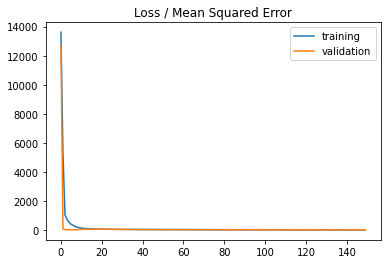

In [ ]:
# Your code here
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [ ]:
# Insert the function for R2 Score
from sklearn.metrics import r2_score
predictions = model(X_test).numpy()
accu = r2_score(y_test, predictions) 
print("Accuracy:", accu)

Accuracy: 0.9965842775880895


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

###My custom model is based on the **FASHION-MNIST DATASET**.
>The dataset consists of <b>70000 28*28 images</b>.<br>
>Each image has a width and height of 28,making it a total of <b>784 pixels</b>.<br>

####For activation function I've used-
- relu activation function
<br>

####For loss function I've used-
- Sparse categorical cross entropy
<br>

####For optimizer I've used-
- Adam
<br>

####For the last part using matplotlib I've visualised how the loss (both validation and training) is changing with the number of iterations.
*The image of the DATASET is as follows :*
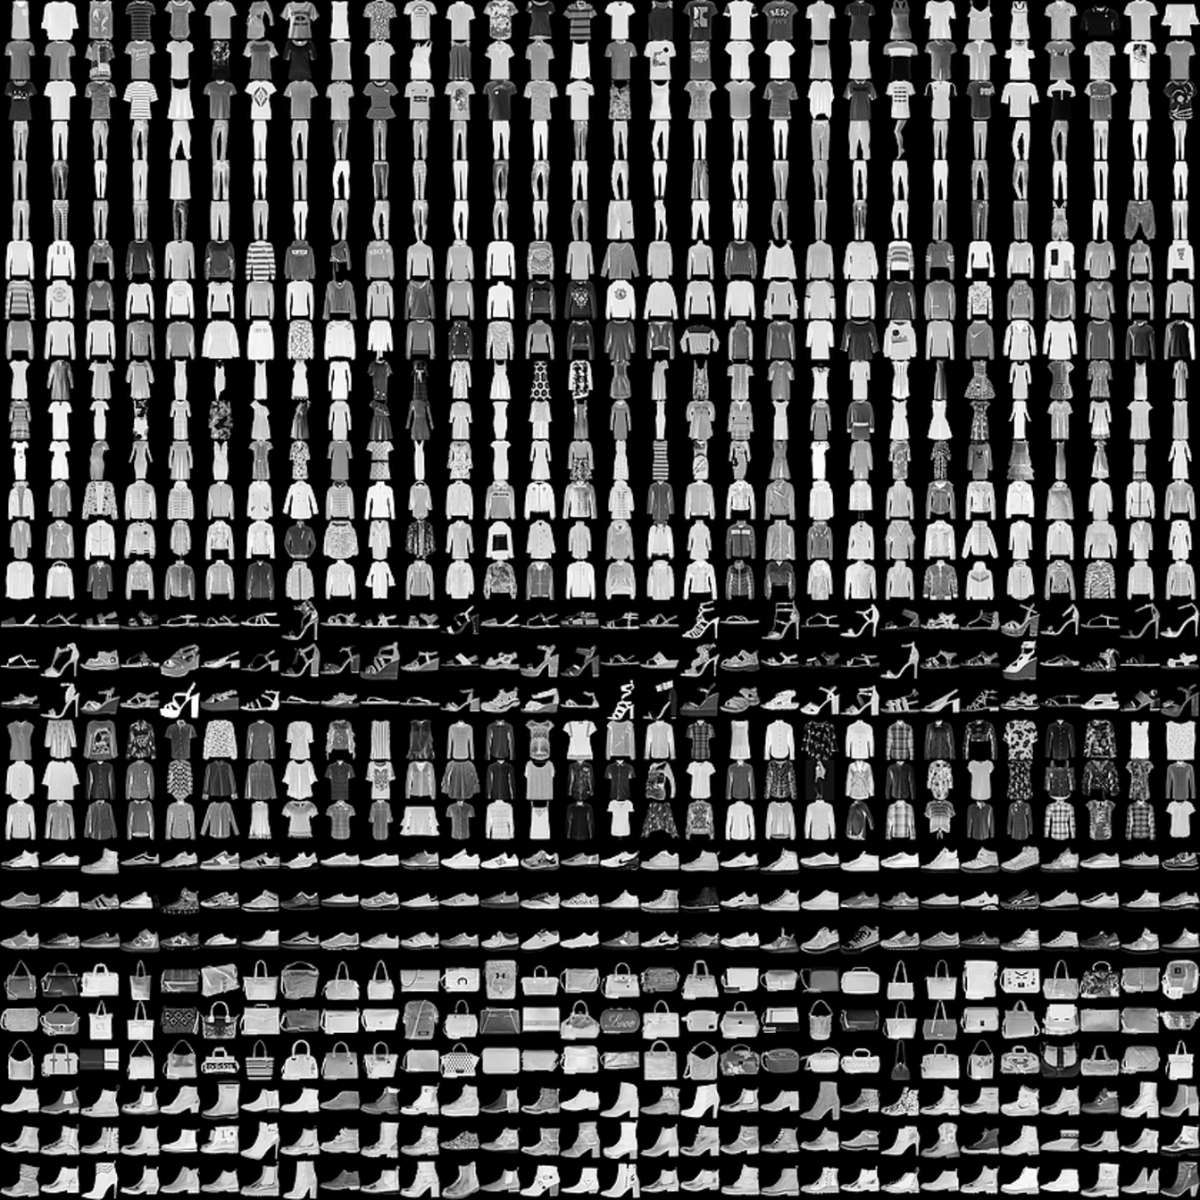

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8461 - accuracy: 0.7046 - val_loss: 0.5440 - val_accuracy: 0.8225
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4475 - accuracy: 0.8484 - val_loss: 0.4380 - val_accuracy: 0.8389
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3720 - accuracy: 0.8682 - val_loss: 0.3991 - val_accuracy: 0.8561
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3422 - accuracy: 0.8766 - val_loss: 0.3893 - val_accuracy: 0.8623
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3234 - accuracy: 0.8834 - val_loss: 0.3883 - val_accuracy: 0.8593
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3076 - accuracy: 0.8876 - val_loss: 0.3828 - val_accuracy: 0.8625
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - los

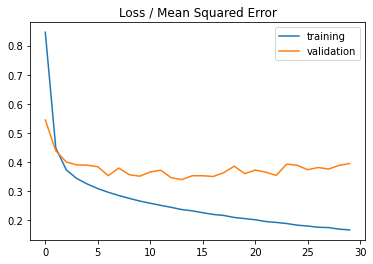

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images=train_images/255.0
test_images=test_images/255.0
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels,validation_data=(test_images, test_labels), epochs=30)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_loss)
print(test_acc)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()